# OpenCV Face Detection
Following tutorial from https://www.datacamp.com/tutorial/face-detection-python-opencv

## Face Detection for Images

In [1]:
# Imports
import cv2
import matplotlib.pyplot as plt

In [2]:
# Load image from file
imgPath = 'input_image.jpg'
img = cv2.imread(imgPath)
img.shape

(4000, 2667, 3)

In [3]:
# Convert image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray.shape

(4000, 2667)

In [4]:
# Load Haar Cascade classifier
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [5]:
# Perform face detection
face = face_classifier.detectMultiScale(
    img_gray, scaleFactor = 1.1, minNeighbors = 5, minSize = (40, 40)
)

In [6]:
# Draw bounding box around detected face
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

(-0.5, 2666.5, 3999.5, -0.5)

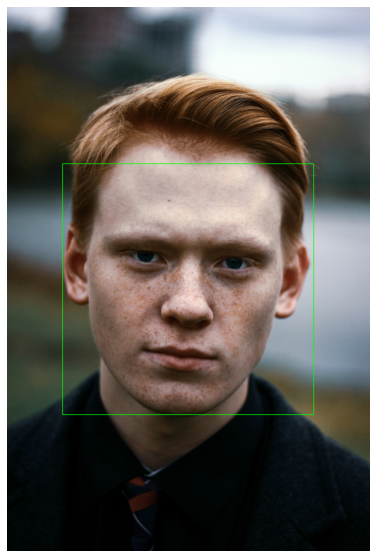

In [7]:
# Displaying image
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (20, 10))
plt.imshow(img_rgb)
plt.axis('off')

## Real-Time Face Detection through Webcam

In [8]:
# Access webcam
video_capture = cv2.VideoCapture(0)

In [ ]:
# Identifying faces in video stream
def detect_bounding_box(vid):
    img_gray = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(img_gray, 1.1, 5, minSize = (40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

In [ ]:
# Use a loop for real-time face detection
while True:

    result, video_frame = video_capture.read() # read frames from video
    if result is False:
        break # terminate the loop if the frame is not read successfully

    faces = detect_bounding_box(video_frame)

    cv2.imshow("Dylan's OpenCV Face Detection Project", video_frame) # display processed frame in window

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_capture.release()
cv2.destroyAllWindows()